In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Salary_Data.csv')


In [3]:
df = pd.DataFrame(data)

  # Understanding the Dataset
 

In [4]:
print(df.shape)
df.head()

(6704, 9)


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
# Checking the data types of the columns

df.dtypes

Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

None of the data type seem to be affecting the columns so we can leave it as it is.

# Cleaning the dataset

In [6]:
# Checking for null values in the columns

print(df.isna().sum())


# Displaying the rows that contain null values

df[df.isnull().any(axis = 1)]

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
3136,3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


Dropping the null rows in the dataset

Because the dataset is relatively large and will not affect any of the operations performed for analysis

In [7]:
# dropping the rows with null value as explained.

df.dropna(inplace=True)

# dropping the unwated column "Unnamed: 0" as it will help us to identify the duplicate data and delete it. 
df.drop('Unnamed: 0', axis =1, inplace=True)

In [14]:
# Checking for duplicate values
print(df.duplicated().sum())

# dropping the duplicate values
df.drop_duplicates(inplace=True)
df.shape

0


(4960, 8)

In [8]:
# Checking for all the unique values in the dataset

for val in df:
    print(df[val].unique())
    print("")
    

[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]

['Male' 'Female' 'Other']

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Exec

It is not ideal to work on numerous Job Titles and would waste a lot of time.

It can be seen that we can make some changes to the Education Level

In [9]:
# Making the required changes in  Education level column

df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")

In [10]:
# Changing the similar Race Types

df['Race'] = df['Race'].replace("Australian","White")
df['Race'] = df['Race'].replace("Welsh","White")
df['Race'] = df['Race'].replace("African American","Black")

In [19]:
# Finding out how many people are from each country

countrycount = df['Country'].value_counts().reset_index()
countrycount.columns=["Country", "Number of People"]
countrycount

,Country,Number of People
0,USA,1079
1,China,1013
2,Canada,988
3,UK,980
4,Australia,900


In [20]:
# Finding out how many people from each Race are present

Race_count = df['Race'].value_counts().reset_index()
Race_count.columns = ["Race", "Number of People"]
Race_count

,Race,Number of People
0,White,1941
1,Asian,1227
2,Black,597
3,Korean,339
4,Chinese,333
5,Hispanic,262
6,Mixed,261


In [27]:
# Finding out how many people of different Race are present in each country

country_race = pd.crosstab(index= df['Country'], columns= df['Race'])
country_race

Race,Asian,Black,Chinese,Hispanic,Korean,Mixed,White
Country,,,,,,,
Australia,358,0,0,0,0,0,542
Canada,330,329,0,0,0,0,329
China,0,0,333,0,339,0,341
UK,268,0,0,0,0,261,451
USA,271,268,0,262,0,0,278


# Visualzing the Data

In [29]:
# Visualization of the Country_race data

country_race_salary = df.groupby(['Country','Race']).agg(Avg_Salary=('Salary','mean')).reset_index().round(0)
country_race_salary

,Country,Race,Avg_Salary
0,Australia,Asian,113870.0
1,Australia,White,112850.0
2,Canada,Asian,114376.0
3,Canada,Black,118315.0
4,Canada,White,114748.0
5,China,Chinese,112321.0
6,China,Korean,117332.0
7,China,White,116789.0
8,UK,Asian,116720.0
9,UK,Mixed,114960.0


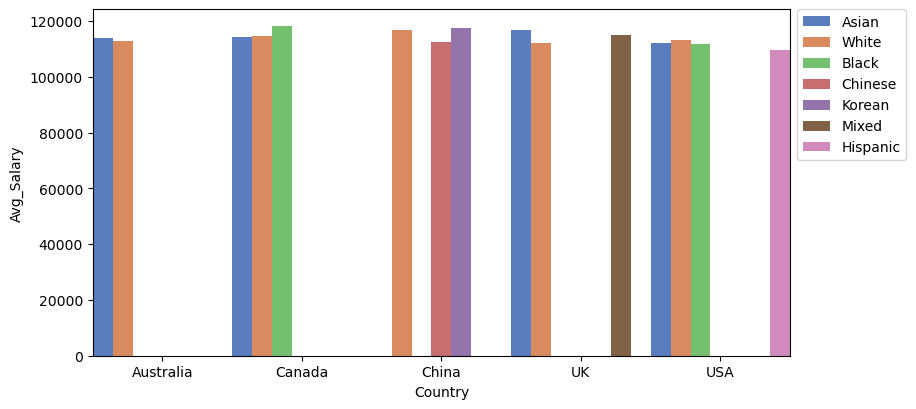

In [208]:
fig, ax = plt.subplots(figsize=(9,4.5))
sns.barplot(data=country_race_salary, x="Country", y="Avg_Salary", hue="Race", palette="muted",width = 1)
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)
plt.show()

***We can see that there is a significant amoutn of uniformity when it comes to the population of the country and the avergae salary of the country***

In [248]:
# countryraceshow=sns.FacetGrid(df, col="Country", col_wrap=2, sharex=False, sharey=False, height=3, aspect=1.5)

# countryraceshow.map(sns.boxplot, 'Race', 'Salary', order=['Asian','White','Black','Chinese','Korean','Mixed'], palette="muted")
# countryraceshow.set_titles(pad=1, fontweight="bold")
# countryraceshow.fig.subplots_adjust(hspace=.5)

In [92]:
# Visualization of the gender distribution in each country with the average salary

country_gender_salary = df.groupby(['Country','Gender']).agg(Average_Salary=('Salary','mean')).reset_index().round(0)
country_gender_salary

,Country,Gender,Average_Salary
0,Australia,Female,106902.0
1,Australia,Male,118747.0
2,Australia,Other,104127.0
3,Canada,Female,106032.0
4,Canada,Male,123715.0
5,Canada,Other,162538.0
6,China,Female,109834.0
7,China,Male,120198.0
8,China,Other,112517.0
9,UK,Female,106747.0


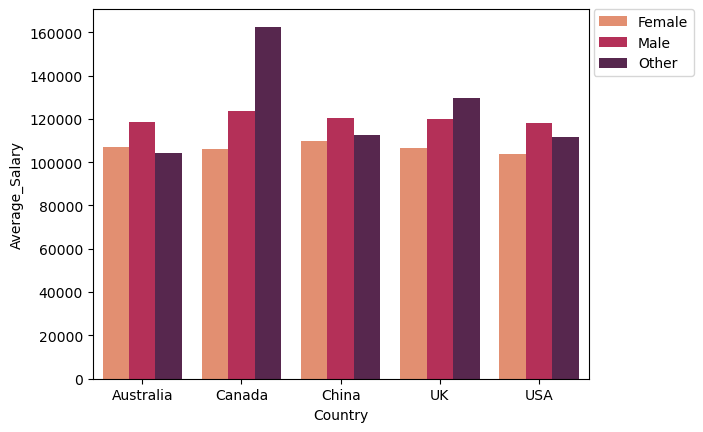

In [109]:
sns.barplot(country_gender_salary,x ='Country', y ='Average_Salary', hue = 'Gender', palette='rocket_r')
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)
plt.show()

In [153]:
# Getting the top 5 Jobs with the maximum salary
a= df[['Job Title','Salary']].groupby(['Job Title']).mean().sort_values(by = ['Salary'], ascending = False).reset_index().round(0).head(5)
a

,Job Title,Salary
0,CEO,250000.0
1,Chief Technology Officer,250000.0
2,Chief Data Officer,220000.0
3,Director of Data Science,203704.0
4,VP of Finance,200000.0


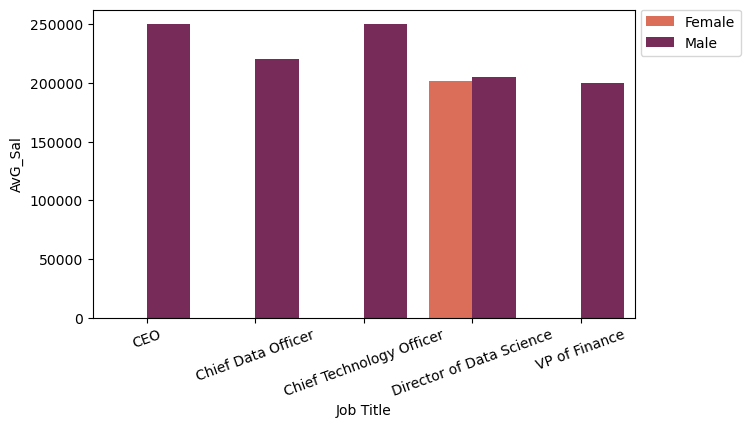

In [196]:
# Gender DIstribution of Top 5 Jobs

top5 = df[df['Job Title'].isin(['CEO','Chief Technology Officer','Chief Data Officer','Director of Data Science','VP of Finance'])]
top5_Gender_Distribution = top5.groupby(['Job Title','Gender']).agg(AvG_Sal=('Salary','mean')).reset_index().round(0)

fig, ax = plt.subplots(figsize= (7,4))
sns.barplot(data = top5_Gender_Distribution,x = 'Job Title', y = 'AvG_Sal',hue='Gender', ax =ax, hue_order=['Female','Male'], palette= 'rocket_r')
plt.xticks(rotation = 20)
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left',borderaxespad = 0)
plt.show()

   ***As per the data it seems almost all of the high paying jobs have male population in common.***

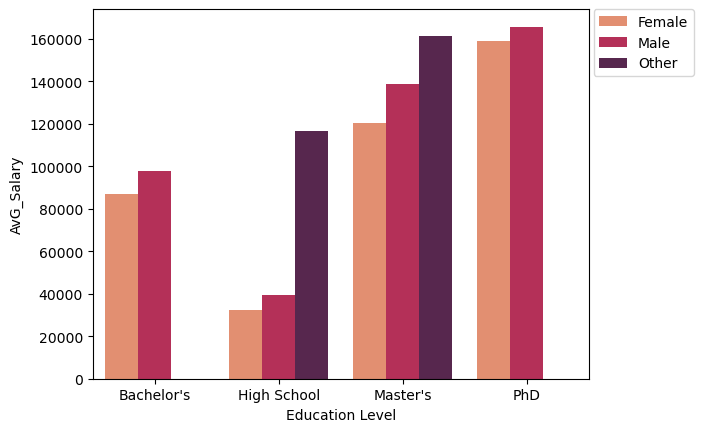

In [246]:
## Education distribution population wise

education_distribution = df.groupby(['Education Level','Gender']).agg(AvG_Salary=('Salary','mean')).reset_index().round(0)


sns.barplot(data = education_distribution, x = 'Education Level', y = 'AvG_Salary', hue='Gender',hue_order=['Female','Male','Other'],palette= 'rocket_r')
plt.legend(bbox_to_anchor=(1.01,1), loc = 'upper left', borderaxespad=0)
plt.show()


***As per the data it can be seen that females earn less comparitively to males and other genders even with the same education***

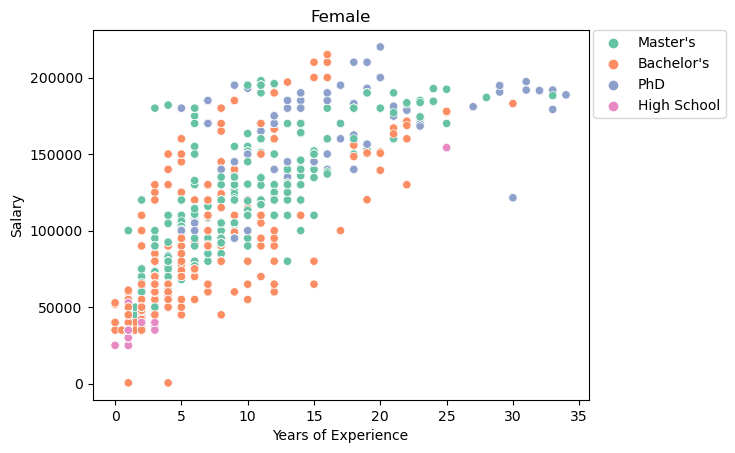

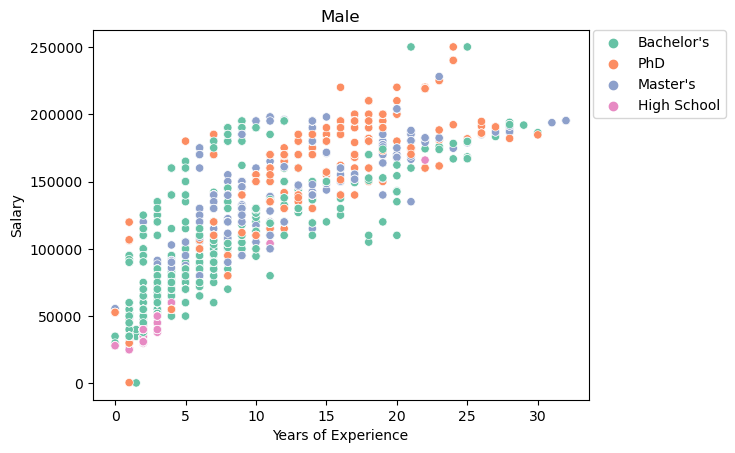

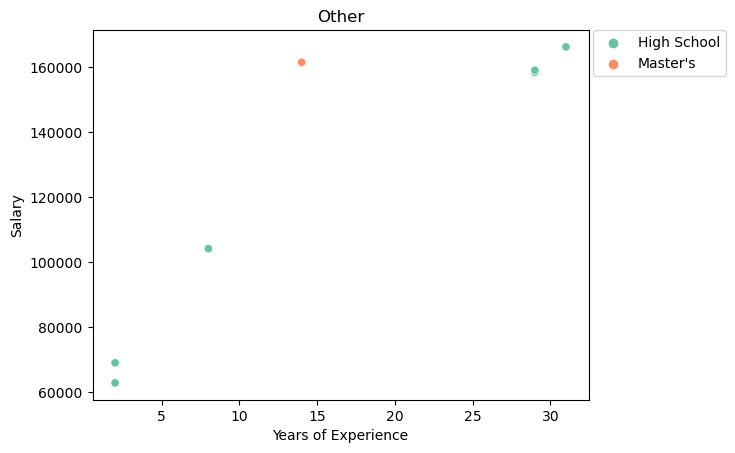

In [297]:
# Scatter plot to show the distribution of female,males and others for education levels, year of experience and salaries.

male_exp_data = df[df['Gender'].isin(['Female'])]
sns.scatterplot(data=male_exp_data, x='Years of Experience', y='Salary', hue='Education Level', palette='Set2')
plt.legend(bbox_to_anchor=(1.01,1),loc ='upper left', borderaxespad=0)
plt.title("Female")
plt.show()

female_exp_data = df[df['Gender'].isin(['Male'])]
sns.scatterplot(data=female_exp_data, x='Years of Experience', y='Salary', hue='Education Level', palette='Set2')
plt.legend(bbox_to_anchor=(1.01,1),loc ='upper left', borderaxespad=0)
plt.title("Male")
plt.show()

other_exp_data = df[df['Gender'].isin(['Other'])]
sns.scatterplot(data=other_exp_data, x='Years of Experience', y='Salary', hue='Education Level', palette='Set2')
plt.legend(bbox_to_anchor=(1.01,1),loc ='upper left', borderaxespad=0)
plt.title("Other")
plt.show()


In [300]:
# Defining the salary ranges for individual in the dataset

salarybins=[0,50000,100000,150000,200000,250000]
salarylabels=['<50,000','<100,000','<150,000','<200,000','<250,000']
df['Salary Range']=pd.cut(x=df['Salary'], bins=salarybins, labels=salarylabels)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Salary Range
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,"<100,000"
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,"<100,000"
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,"<150,000"
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,"<100,000"
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,"<200,000"
...,...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0,Canada,Asian,"<100,000"
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed,"<200,000"
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,White,"<50,000"
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,China,Chinese,"<100,000"


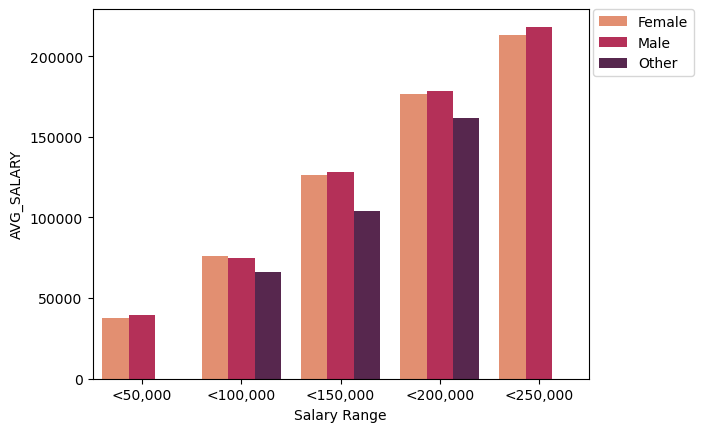

In [307]:
# Gender wise Salary range

Salary_Gender = df.groupby(['Salary Range','Gender']).agg(AVG_SALARY = ('Salary','mean')).reset_index().round(0)

sns.barplot(data = Salary_Gender, x = 'Salary Range', y = 'AVG_SALARY', hue = 'Gender', palette='rocket_r')
plt.legend(bbox_to_anchor=(1.01,1), loc = 'upper left', borderaxespad= 0)
plt.show()

# Insights

1. As per the data it can be seen that the average salary is quite similar for each race in the country.
2. In Canada and UK the Other Gender's Average Salary is quite high as compared to other countries where male population is earning high.
3. The top 5 highest paying jobs are 'CEO','Chief Technology Officer','Chief Data Officer','Director of Data Science' and 'VP of Finance' and almost all of the top 5 highest paying jobs have male population in common.
4. It can be seen that Females are earning less even with the same education level as that of males.
5. We cannot reach a conclusion that if the higher education affect the salaries with the scatter plot we plotted but we can say that with increasing experience the salries are getting higher.
6. We can say that Males and Females are similar in counts when it comes to different salary ranges.

